## Reto: Analítica de texto aplicada al estudio de sentimientos para la toma de decisiones 👩🏽‍💻🙂

**Duración:** 2.5 hrs.

**Objetivo:** Construir un corpus utilizando las herramientas que has practicado a lo largo del módulo y realizar las siguientes actividades:
* Calcular las frecuencias de longitudes de texto, frecuencias de palabras más comunes y extensión de vectores de stopwords.
* Realizar las operaciones de procesamiento básico de textos: tokenizar, aplicar stemming, remover stopwords.
* Crear gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.
* Implementar y aplicar el análisis de sentimientos a los textos que se han recopilado en el corpus.

**Instrucciones:**

Descarga los archivos FinancialTweets.zip y Toys_and_Games.json, y realiza los siguientes pasos:

1. Elige uno de los datasets para trabajar:
* **Análisis de sentimientos en un dataset de tweets financieros.** Algunos de los influencers cuyos tweets fueron monitoreados son: 'MarketWatch', 'empresa', 'YahooFinance', 'TechCrunch', 'WSJ', 'Forbes', 'FT', 'TheEconomist', 'nytimes', 'Reuters', 'GerberKawasaki', 'jimcramer', ' TheStreet ',' TheStalwart ',' TruthGundlach ',' CarlCIcahn ',' ReformedBroker ',' benbernanke ',' bespokeinvest ',' BespokeCrypto ',' stlouisfed ',' federalreserve ',' GoldmanSachs ',' ianbremmer ',' MorganStanley ' , 'AswathDamodaran', 'mcuban', 'muddywatersre', 'StockTwits', 'SeanaNSmith'. Trabaja con el archivo FinancialTweets.zip.
* **Análisis de sentimientos de un dataset de reseñas de juguetes y juegos de Amazon.** El archivo de origen se encuentra en formato .json. Por lo anterior, crear el corpus requiere de un procesamiento adicional de los documentos .json. Trabaja con el archivo Toys_and_Games.json.
2. Genera un archivo en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.
3. Del archivo descargado (FinancialTweets.zip o Toys_and_Games.json) o con un dataset propio, guarda todos sus registros en un DataFrame.
4. Corre la preparación y creación del corpus: cálculo de frecuencias de longitudes de texto, frecuencias de palabras más comunes, extensión de vectores de stopwords.
5. Realiza las operaciones de procesamiento básico: tokenizar, aplicar stemming, remover stopwords.
6. Crea gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.
7. Agrega una interpretación de resultados obtenidos del análisis realizado.
8. Descarga el archivo .ipynb y nómbralo de la siguiente manera: DS_C6_SC5_NOMBRE.

### 🔍Preparación previa de datos

In [1]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import json
import pandas as pd

# Ruta al archivo ZIP
zip_path = '/content/drive/My Drive/Colab Notebooks/Análisis de texto/Toys_and_Games.zip'

# Nombre del archivo JSON dentro del ZIP
json_filename = 'Toys_and_Games.json'

data = []  # Lista para almacenar objetos JSON individuales

# Paso 1: Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extraer el archivo JSON a un objeto en memoria
    with zip_ref.open(json_filename) as json_file:
        # Paso 2: Leer el archivo JSON línea por línea
        for line in json_file:
            try:
                data.append(json.loads(line))  # Intento de decodificar cada línea
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line: {e}")  # Log de errores

# Paso 3: Convertir el JSON a un DataFrame
df_reviews = pd.DataFrame(data)  # Crear DataFrame de la lista de objetos JSON

# Mostrar el DataFrame
df_reviews.head(10)

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a13282b741a2384e879a620'},A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4.0,Charming characters but busy work required,1377561600,"08 27, 2013",Toys_and_Games,1.0
1,{'$oid': '5a13282b741a2384e879a621'},A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3.0,No directions for use...,1404864000,"07 9, 2014",Toys_and_Games,0.0
2,{'$oid': '5a13282b741a2384e879a622'},A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5.0,Great CD-ROM,1382400000,"10 22, 2013",Toys_and_Games,1.0
3,{'$oid': '5a13282b741a2384e879a61f'},AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5.0,Puzzles,1388016000,"12 26, 2013",Toys_and_Games,1.0
4,{'$oid': '5a13282b741a2384e879a623'},A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5.0,Algebra II -- presentation materials,1374278400,"07 20, 2013",Toys_and_Games,1.0
5,{'$oid': '5a13282b741a2384e879a624'},A3NXHTSEBX9YHB,0279515766,marlenetbueras,"[0, 0]",i am glad to get it after 25 yr of waiting for...,5.0,my strawberry shortcake,1363564800,"03 18, 2013",Toys_and_Games,1.0
6,{'$oid': '5a13282b741a2384e879a626'},A3CJHKFHHQJP2K,0375829695,"Beth Sharo ""bookmom""","[0, 0]",My son got this book for his birthday. He lov...,1.0,Disappointing Puzzle Book,1297209600,"02 9, 2011",Toys_and_Games,0.0
7,{'$oid': '5a13282b741a2384e879a627'},A3638FINP26E8N,0375829695,C. Boykin,"[1, 1]",Love the book format. My 4yr old grandson love...,3.0,frustrating puzzle pieces,1282521600,"08 23, 2010",Toys_and_Games,0.0
8,{'$oid': '5a13282b741a2384e879a62a'},A1QG5NJW3LOTSO,0375829695,H. Chao,"[0, 0]",On the plus side - puzzle book format and deli...,3.0,mixed feelings,1201564800,"01 29, 2008",Toys_and_Games,0.0
9,{'$oid': '5a13282b741a2384e879a629'},A27GZ92KLXDJVJ,0375829695,D. Glade,"[1, 1]",This puzzle is poorly made. The picture part ...,2.0,Cheaply made puzzle - not worth your $!,1264550400,"01 27, 2010",Toys_and_Games,0.0


In [3]:
# Información del DataFrame
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997140 entries, 0 to 1997139
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   _id             object 
 1   reviewerID      object 
 2   asin            object 
 3   reviewerName    object 
 4   helpful         object 
 5   reviewText      object 
 6   overall         float64
 7   summary         object 
 8   unixReviewTime  int64  
 9   reviewTime      object 
 10  category        object 
 11  class           float64
dtypes: float64(2), int64(1), object(9)
memory usage: 182.8+ MB


### 👩🏽‍💻Preparación y creación del corpus

In [5]:
# Importación de librerías
import regex as re
import nltk

In [13]:
# Instalación de stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
print(stopwords)

{'wouldn', "wouldn't", "she's", 'above', 's', "that'll", "aren't", 'has', 'of', 'for', 'until', 'his', 'weren', "weren't", 'did', 'after', 'have', 'in', 'here', 'more', 'wasn', 'to', 'hers', 'ourselves', 'needn', 'before', 'does', 'few', 'further', 'so', 'hasn', 'our', 'nor', 'its', 'being', "you'll", 'this', 'doing', 'their', 'into', 'own', 'himself', 'that', 'them', 'had', 'll', 'you', 'having', 'only', 'these', 'won', 'herself', 'while', 'd', 'yourself', 'the', 'they', 'am', 'through', 'your', 'from', 'not', 'be', 'if', 'i', 'with', 'an', "don't", 'my', 'aren', 'her', 'by', 'mightn', 'do', 'is', 'during', 'again', 'down', 'no', 're', 'but', 'out', 'themselves', "isn't", "haven't", "it's", 'couldn', 'mustn', 'him', 'once', 'both', 'or', 'what', "you'd", 'same', 'theirs', "shan't", 'been', 'ain', 'ma', 'she', 'those', 'were', 'all', 'a', 'we', 'who', 'then', 'there', 'under', 'when', 'was', 'why', 'ours', 'too', 'doesn', "hadn't", 'very', 'how', 'because', 'each', 'on', 'myself', 'oth

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Agregar stopwords relacionadas con reviews
reviews_stopwords = ['product','review','would','thing','just','make','use','also','time','one','know','see','go','way','work','get']
stopwords.update(reviews_stopwords)
print(stopwords)

{'wouldn', "wouldn't", "she's", 'above', 's', "that'll", "aren't", 'has', 'of', 'way', 'for', 'until', 'his', 'weren', "weren't", 'did', 'after', 'have', 'in', 'here', 'more', 'wasn', 'to', 'hers', 'ourselves', 'needn', 'before', 'does', 'few', 'further', 'so', 'thing', 'hasn', 'our', 'nor', 'its', 'being', "you'll", 'this', 'doing', 'their', 'into', 'own', 'himself', 'that', 'them', 'had', 'll', 'you', 'having', 'only', 'these', 'won', 'herself', 'while', 'd', 'yourself', 'the', 'they', 'am', 'through', 'your', 'from', 'not', 'be', 'go', 'if', 'i', 'with', 'an', "don't", 'my', 'aren', 'her', 'time', 'by', 'mightn', 'one', 'do', 'is', 'during', 'again', 'down', 'no', 're', 'but', 'out', 'themselves', "isn't", "haven't", "it's", 'couldn', 'mustn', 'him', 'once', 'both', 'or', 'what', "you'd", 'same', 'theirs', 'would', "shan't", 'been', 'ain', 'ma', 'she', 'those', 'were', 'all', 'a', 'we', 'who', 'then', 'there', 'under', 'when', 'use', 'was', 'why', 'ours', 'too', 'doesn', "hadn't", '

In [15]:
# Funciones de limpieza
def tokeniza(texto):
  return re.findall(r'[\w-]*\p{L}[\w-]*', texto)

def quita_stopword(palabras):
  return [palabra for palabra in palabras if
  palabra.lower() not in stopwords]

In [16]:
# Función para crear el corpus
def crea_corpus(textos):
  corpus=[]
  textos=textos.values.tolist()
  for oracion in textos:
    tokens = tokeniza(oracion)
    longitud = len(tokens)
    palabras = quita_stopword(tokens)
    corpus.append({'longitud': longitud, 'palabras': palabras})
  return corpus

In [17]:
# Creación de corpus
corpus = crea_corpus(df_reviews['reviewText'])

In [18]:
# Mostrar los primeros 10 elementos del corpus
print(corpus[:10])

[{'longitud': 115, 'palabras': ['love', 'felt', 'nursery', 'rhyme', 'characters', 'scenes', 'quality', 'felt', 'good', 'illustrations', 'detailed', 'pretty', 'noted', 'figures', 'scenes', 'printed', 'large', 'sheets', 'flannel', 'individual', 'item', 'needs', 'cut', 'process', 'took', 'hours', 'tiny', 'cutting', 'lend', 'book', 'form', 'rather', 'laying', 'scenes', 'separately', 'flannel', 'board', 'However', 'love', 'quiet', 'play', 'offers', 'toddler', 'former', 'Kindergarten', 'teacher', 'understand', 'value', 'learning', 'rhyme', 'connection', 'future', 'reading', 'Overall', 'delightful', 'involved']}, {'longitud': 16, 'palabras': ['directions', 'Therefore', 'games', 'unfortunately']}, {'longitud': 30, 'palabras': ['great', 'tool', 'teacher', 'using', 'Pre', 'Calculus', 'Enhanced', 'Graphing', 'Utilities', 'book', 'edition', 'Easy', 'extensive', 'test', 'bank', 'Excellent']}, {'longitud': 22, 'palabras': ['Great', 'thank', 'son', 'loved', 'puzzles', 'large', 'pieces', 'yet', 'still

In [19]:
from collections import Counter

todas_las_palabras = []

# Combinar todas las palabras en una sola lista
for entrada in corpus:
    todas_las_palabras.extend(entrada['palabras'])

# Contar las frecuencias de palabras
frecuencia_palabras = Counter(todas_las_palabras)

# Obtener las 10 palabras más comunes
palabras_comunes = frecuencia_palabras.most_common(10)

# Mostrar las palabras más comunes
print(palabras_comunes)

[('great', 470523), ('old', 445973), ('like', 426713), ('game', 425075), ('toy', 410592), ('little', 373466), ('fun', 345099), ('loves', 337793), ('play', 333083), ('year', 326828)]


### 📊Gráficas para exploración de datos

##### Top 10 palabras más comunes en reseñas

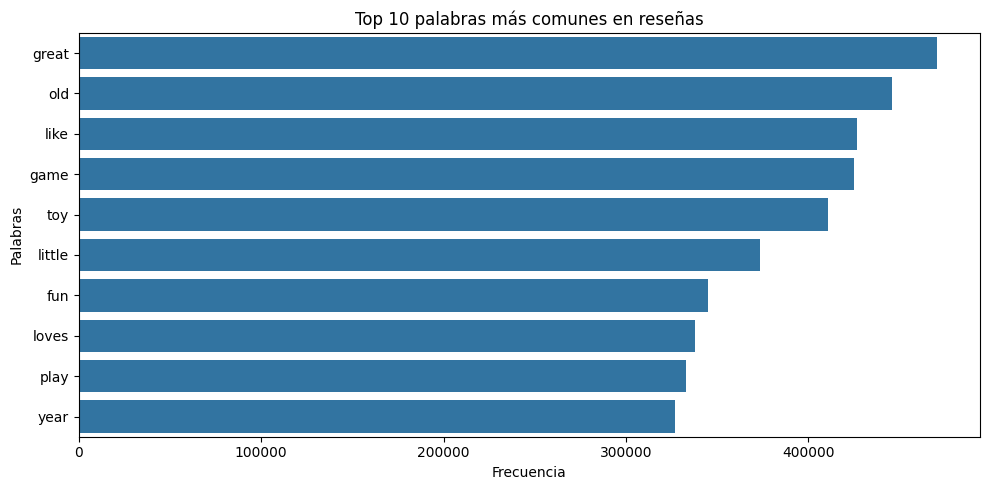

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer palabras y frecuencias
palabras, frecuencias = zip(*palabras_comunes)

# Crear un DataFrame de pandas
df_palabras = pd.DataFrame({'Palabra': palabras, 'Frecuencia': frecuencias})

# Crear la gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras)

# Añadir títulos y etiquetas
plt.title('Top 10 palabras más comunes en reseñas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

##### WordCloud

In [25]:
from wordcloud import WordCloud

def nube_palabras(todas_las_palabras, stopwords, color):
  stopwords = set(stopwords)
  texto_completo = ' '.join(todas_las_palabras)
  wordcloud = WordCloud(background_color=color, stopwords=stopwords, max_words=100, max_font_size=45, scale=3, random_state=1)
  wordcloud = wordcloud.generate(str(texto_completo))

  fig = plt.figure(1, figsize=(15, 15))
  plt.imshow(wordcloud)
  plt.show()

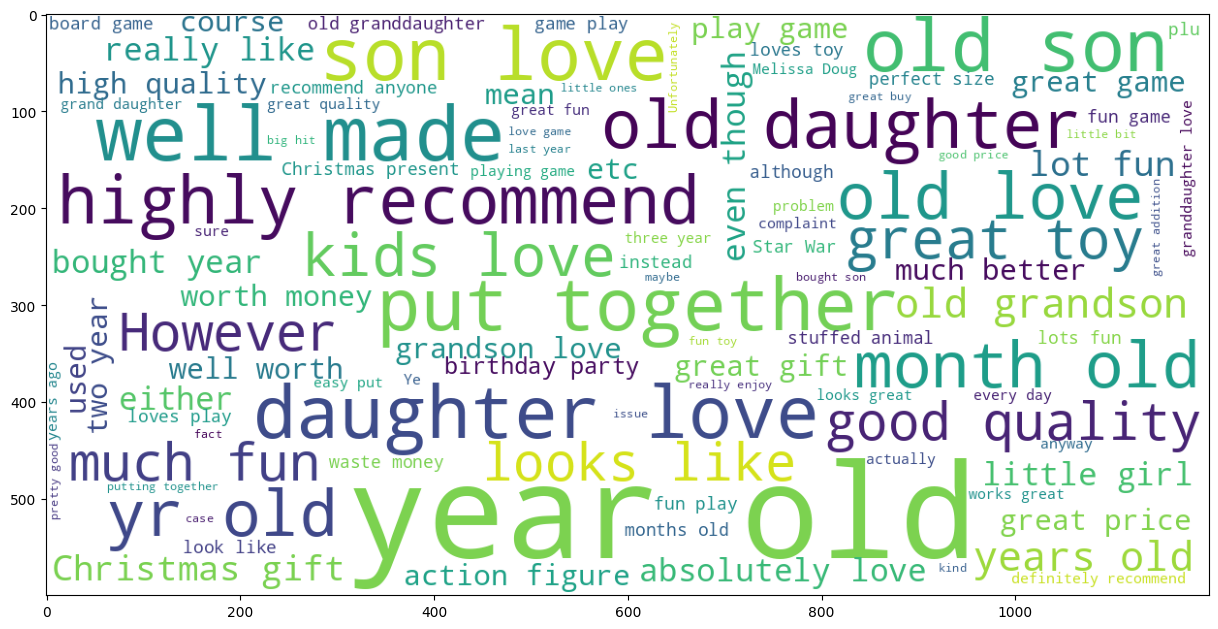

In [26]:
nube_palabras(todas_las_palabras, stopwords, 'white')

##### Análisis de sentimientos

In [27]:
!pip install textblob

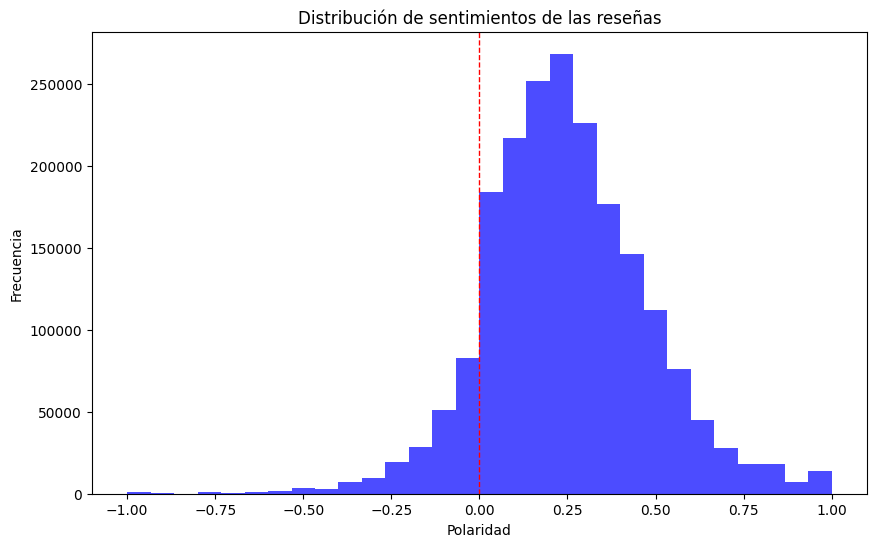

In [29]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Función para analizar sentimientos
def analizar_sentimientos(reviews):
    sentimientos = []
    for review in reviews:
        analisis = TextBlob(review)
        sentimientos.append(analisis.sentiment.polarity)  # Obtiene la polaridad del sentimiento
    return sentimientos

# Análisis de sentimientos de las reseñas
df_reviews['sentimientos'] = analizar_sentimientos(df_reviews['reviewText'])

# Graficar la distribución de sentimientos
plt.figure(figsize=(10, 6))
plt.hist(df_reviews['sentimientos'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de sentimientos de las reseñas')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Línea para 0 (neutral)
plt.show()

In [31]:
# Indicadores de sentimientos
import numpy as np

# Calcular promedio de polaridad
promedio_polaridad = df_reviews['sentimientos'].mean()
print(f"Promedio de Polaridad: {promedio_polaridad:.2f}")

# Clasificación de sentimientos
condiciones = [
    (df_reviews['sentimientos'] > 0.1),  # Positivo
    (df_reviews['sentimientos'] < -0.1),  # Negativo
]
elecciones = ['Positivo', 'Negativo']

# Añadir columna de sentimiento categorizado
df_reviews['sentimiento_categoria'] = np.select(condiciones, elecciones, default='Neutral')

# Contar reseñas por categoría de sentimiento
conteo_sentimientos = df_reviews['sentimiento_categoria'].value_counts()
print("\nConteo de Sentimientos:")
print(conteo_sentimientos)

Promedio de Polaridad: 0.25

Conteo de Sentimientos:
sentimiento_categoria
Positivo    1495715
Neutral      405677
Negativo      95748
Name: count, dtype: int64


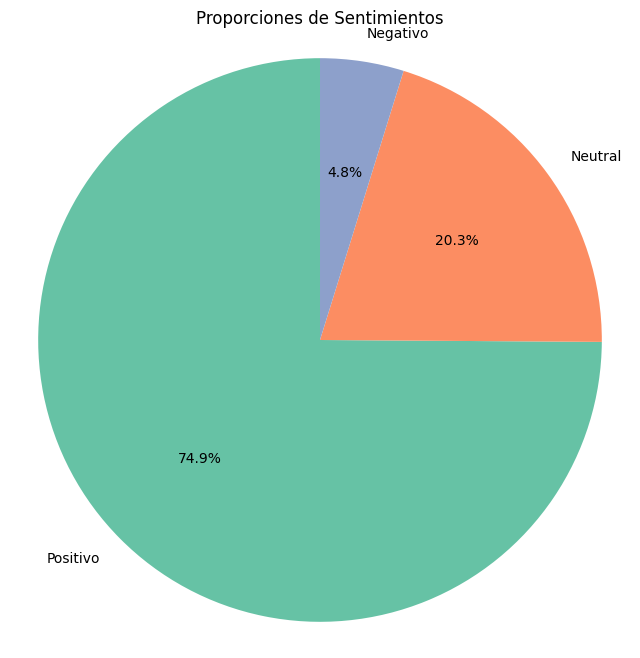

In [32]:
# Gráfica de proporciones de sentimientos
plt.figure(figsize=(8, 8))
plt.pie(conteo_sentimientos, labels=conteo_sentimientos.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Proporciones de Sentimientos')
plt.axis('equal')  # Para que el pie sea un círculo
plt.show()

<ipython-input-33-3e7d7e7e8a70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentimiento_categoria', y='sentimientos', data=df_reviews, palette='Set2')


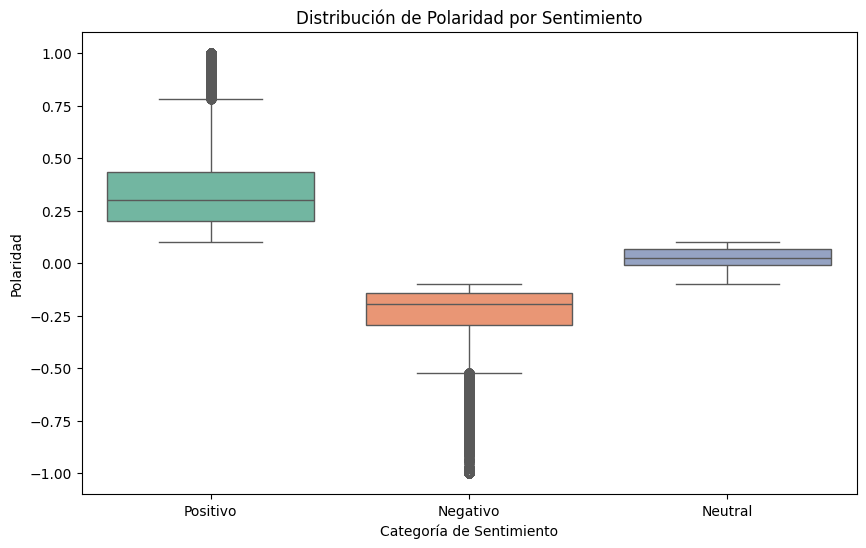

In [33]:
# Boxplot de polaridad
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentimiento_categoria', y='sentimientos', data=df_reviews, palette='Set2')
plt.title('Distribución de Polaridad por Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Polaridad')
plt.show()

### 📄Interpretación de resultados

El análisis de sentimientos realizado sobre las reseñas de juguetes mostró resultados notablemente positivos. Al comenzar con el análisis de **top 10 de palabras más comunes**, se identificaron términos como "great," "like," "fun," y "loves," que reflejan una percepción favorable hacia los productos evaluados. Esto sugiere que los consumidores están satisfechos con sus compras y que los juguetes han sido bien recibidos, especialmente entre los niños que los recibieron como regalos.

La **nube de palabras** (word cloud) también destaca frases recurrentes como "highly recommend," "love," "well made," "good quality," y "much fun," lo que refuerza la percepción positiva general. Estas palabras indican que los consumidores no solo están satisfechos con la calidad de los productos, sino que también están dispuestos a recomendarlos a otros.

La **distribución de sentimientos**, ilustrada en el histograma, muestra un sesgo claro hacia la polaridad positiva, con una mayoría de reseñas agrupadas en el lado derecho de la escala de polaridad. Esta distribución indica que, aunque existen críticas negativas, estas son significativamente menos frecuentes en comparación con las reseñas positivas.

Finalmente, al analizar el **conteo de sentimientos**, se encontró que aproximadamente el 75% de las reseñas son positivas, lo que sugiere una fuerte aceptación de los juguetes por parte de los usuarios. En contraste, solo un 20% de las reseñas se clasifican como neutrales y un escaso 4.8% se consideran negativas. Este patrón refuerza la idea de que los consumidores están satisfechos con sus compras, lo cual es un indicador favorable para la reputación de las marcas en este dataset y la calidad del producto.

En conjunto, estos resultados sugieren que los juguetes de las reseñas en cuestión han cumplido con las expectativas de los consumidores, brindando una experiencia satisfactoria que probablemente fomente futuras compras y recomendaciones.

Realizar un **análisis de sentimientos** en reseñas de productos, como en el caso de los juguetes, es fundamental para comprender la percepción del consumidor y evaluar la calidad de los productos ofrecidos. Este tipo de análisis proporciona a las empresas información valiosa sobre las preferencias y experiencias de los clientes, lo que les permite identificar áreas de mejora, fortalecer su reputación de marca y optimizar la satisfacción del cliente. Además, al analizar las emociones expresadas en las reseñas, las empresas pueden tomar decisiones informadas sobre el desarrollo de productos futuros y estrategias de marketing, asegurando que respondan efectivamente a las necesidades y deseos de su público objetivo.